In [1]:
# Install vader sentiment package
!pip install vaderSentiment

# Install textblob package
!pip install textblob

# Install WordCloud package
!pip install wordcloud

!pip install unidecode

# Install Contractions package
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.5 MB/s eta 0:00:00


In [3]:
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

# It helps to remove the accented characters
from bs4 import BeautifulSoup

import contractions
import warnings
warnings.filterwarnings('ignore')

import re

import unidecode

import unicodedata

import string

from sklearn.preprocessing import LabelEncoder

# Using TfidfVectorizer to convert text data to numbers.
from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.over_sampling import SMOTE

import pickle

# Importing the NLTK library
import nltk

#nltk.download('omw-1.4')
# # downloading vader lexicon
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')


# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS

# Used in Stemming
from nltk.stem.porter import PorterStemmer

from nltk import word_tokenize

# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [45]:
from keras.preprocessing.text import Tokenizer

## Loading Data:

In [4]:
data = pd.read_csv('/content/drive/MyDrive/MLOps Class/Project 1/Tweets.csv')

In [5]:
# Selecting required features:
df = data[['text', 'airline_sentiment']]

### Exploratory Data Analysis:

In [6]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [7]:
df.shape

(14640, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [9]:
df.duplicated().sum()

188

- There are 188 duplicates in the data.

In [10]:
# Function for displaying the WordCloud:
def create_wordcloud(data, sent_value):
    tweet_data = data[data['sentiment'] == sent_value]

    words = ' '.join(tweet_data['tweet'])

    #cleaned_word = " ".join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(words)

    plt.figure(1, figsize = (12, 12))

    plt.imshow(wordcloud)

    plt.axis('off')

    plt.show()

In [11]:
# Check the imbalance in label:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

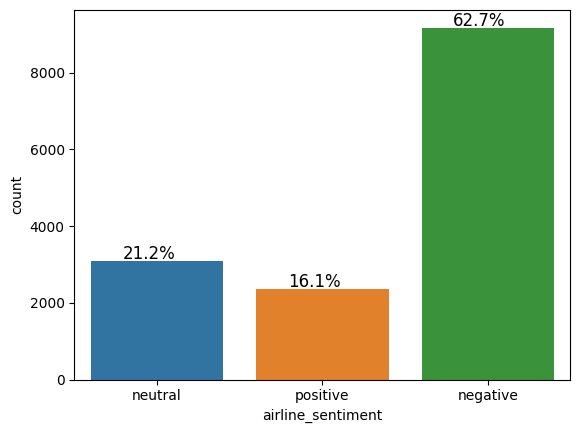

In [12]:
# Plot the distribution of the class label
def bar_plot(data, feature):
    # Creating the countplot
    plot = sns.countplot(x = feature, data = data)

    # Finding the length the whole data
    total = len(data)

    # Creating the percentages to each label in the data
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points")
    plt.show()

bar_plot(df,'airline_sentiment')

- Target (Sentiment) class is imbalanced.

## Preprocessing

In [13]:
# Renaming features:
df.rename(columns={'text':'tweet', 'airline_sentiment':'sentiment'}, inplace=True)

In [14]:
df.head()

,tweet,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [15]:
#Dropping duplicates:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
# HTML remover:
def html_remover(text):
  sp = BeautifulSoup(text)
  clean_text = sp.get_text()
  return clean_text
df['tweet'] = df['tweet'].apply(lambda x: html_remover(x))
df.head()

,tweet,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [18]:
# Removing Contractios:
def replace_contractions(text):
  return contractions.fix(text)

df['tweet'] = df['tweet'].apply(lambda x: replace_contractions(x)) # Applies the function on the tweet column
df.head()

,tweet,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [19]:
# Removing Special Characters:
def remove_special_chars(text):
  text = re.sub('[^a-zA-Z]', ' ', text) #
  return text

df['tweet'] = df['tweet'].apply(lambda x: remove_special_chars(x))



In [20]:
df.head()

,tweet,sentiment
0,VirginAmerica What dhepburn said,neutral
1,VirginAmerica plus you have added commercials to the experience tacky,positive
2,VirginAmerica I did not today Must mean I need to take another trip,neutral
3,VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,negative
4,VirginAmerica and it is a really big bad thing about it,negative


In [21]:
# Tokenization:
df['tweet'] = df.apply(lambda row: word_tokenize(row['tweet']), axis=1)
df.head()

,tweet,sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [22]:
# Removing digits:
def remove_digit(tweet):
  tokens = [word for word in tweet if not word.isdigit()]
  return tokens

df['tweet'] = df['tweet'].apply(lambda x: remove_digit(x))
df.head()

,tweet,sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [23]:
# Removing non_ascii characters:
def remove_non_ascii(row):
  new_row = []
  for word in row:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii','ignore').decode('utf-8', 'ignore')
    new_row.append(new_word)
  return new_row

df['tweet'] = df['tweet'].apply(lambda x: remove_non_ascii(x))
df.head()

,tweet,sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# Removing Punctuations
def remove_punctuation(row):
  tokens = [word for word in row if word not in string.punctuation]
  return tokens

df['tweet'] = df['tweet'].apply(lambda x: remove_punctuation(x))
df.head()

,tweet,sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [26]:
# Removing Stop words:
stop_words = stopwords.words('english')

def remove_stopwords(row):
  words = [word for word in row if word not in stop_words]
  return words

df['tweet'] = df['tweet'].apply(lambda x: remove_stopwords(x))
df.head()

,tweet,sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, added, commercials, experience, tacky]",positive
2,"[VirginAmerica, I, today, Must, mean, I, need, take, another, trip]",neutral
3,"[VirginAmerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]",negative
4,"[VirginAmerica, really, big, bad, thing]",negative


In [27]:
# Lemmatization:
lm = WordNetLemmatizer()

def lemmatize_words(row):
  words = [lm.lemmatize(word) for word in row]
  return words

df['tweet'] = df['tweet'].apply(lambda x: lemmatize_words(x))
df.head()

,tweet,sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, added, commercial, experience, tacky]",positive
2,"[VirginAmerica, I, today, Must, mean, I, need, take, another, trip]",neutral
3,"[VirginAmerica, really, aggressive, blast, obnoxious, entertainment, guest, face, little, recourse]",negative
4,"[VirginAmerica, really, big, bad, thing]",negative


In [28]:
# Converting words to lowercse:
def to_lowercase(row):
  words = [word.lower() for word in row]
  return words

df['tweet'] = df['tweet'].apply(lambda x: to_lowercase(x))
df.head()

,tweet,sentiment
0,"[virginamerica, what, dhepburn, said]",neutral
1,"[virginamerica, plus, added, commercial, experience, tacky]",positive
2,"[virginamerica, i, today, must, mean, i, need, take, another, trip]",neutral
3,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guest, face, little, recourse]",negative
4,"[virginamerica, really, big, bad, thing]",negative


In [29]:
# saving the cleaned text back to tweet column
def join_words(row):
  words = ' '.join([word for word in row])  # Puts everything into a string i.e from ['a','b'] to 'a b'. Necessary for tf-idf.
  return words

df['tweet'] = df['tweet'].apply(lambda x: join_words(x))
df.head()

,tweet,sentiment
0,virginamerica what dhepburn said,neutral
1,virginamerica plus added commercial experience tacky,positive
2,virginamerica i today must mean i need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guest face little recourse,negative
4,virginamerica really big bad thing,negative


In [30]:
# Encoding target variable:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
df.head()

,tweet,sentiment
0,virginamerica what dhepburn said,1
1,virginamerica plus added commercial experience tacky,2
2,virginamerica i today must mean i need take another trip,1
3,virginamerica really aggressive blast obnoxious entertainment guest face little recourse,0
4,virginamerica really big bad thing,0


WordCloud for sentiment: 1


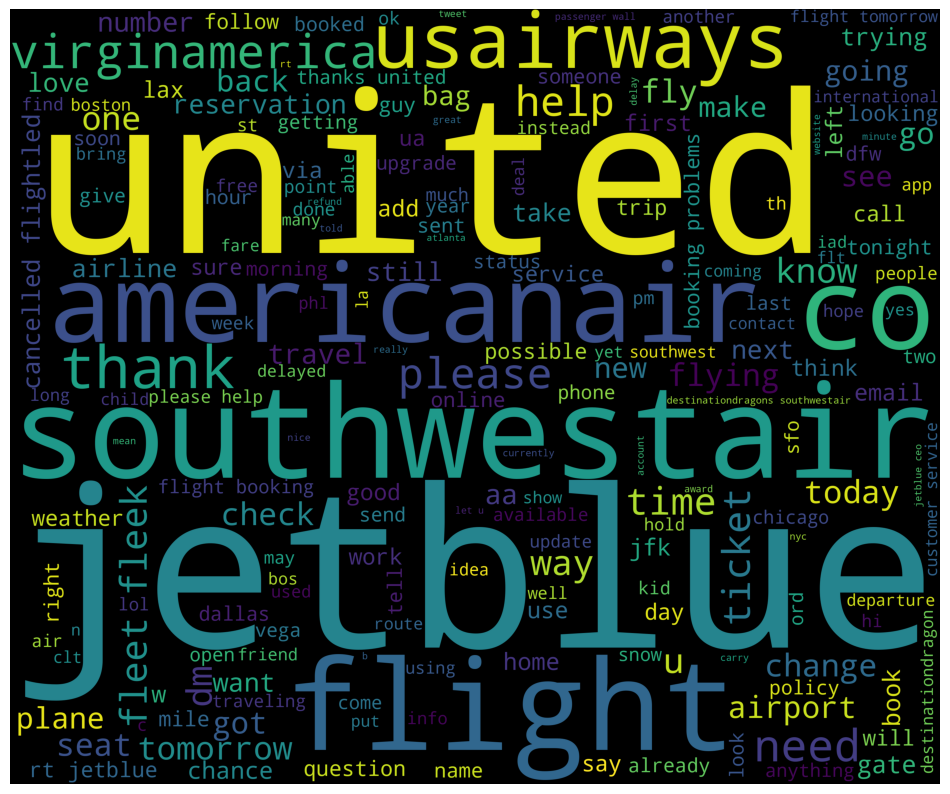

WordCloud for sentiment: 2


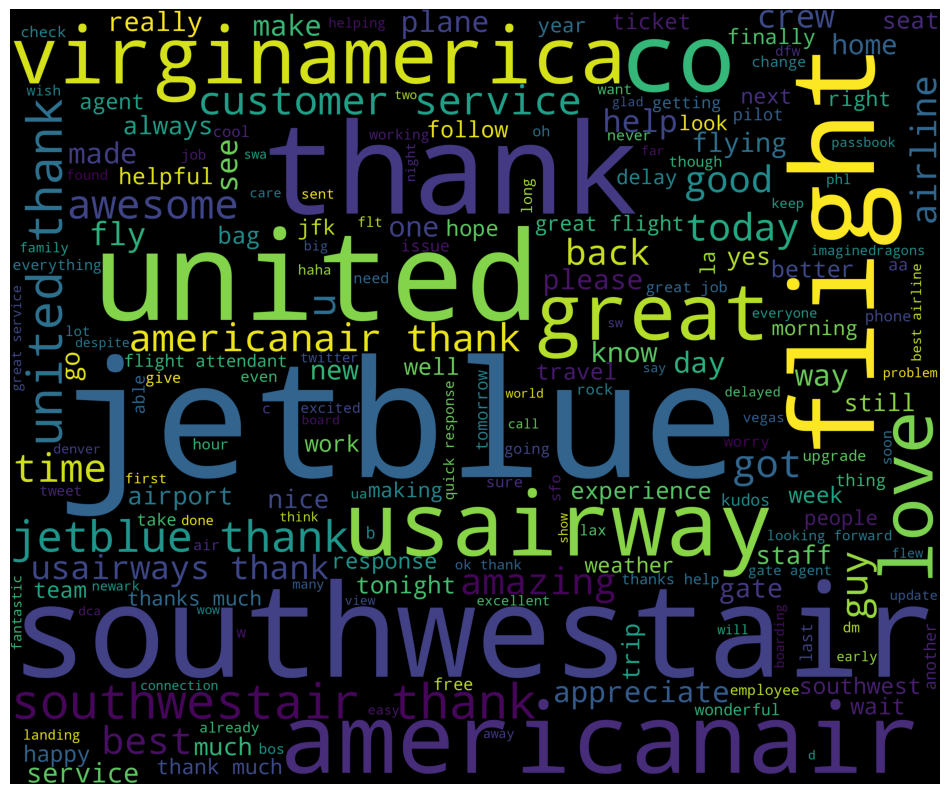

WordCloud for sentiment: 0


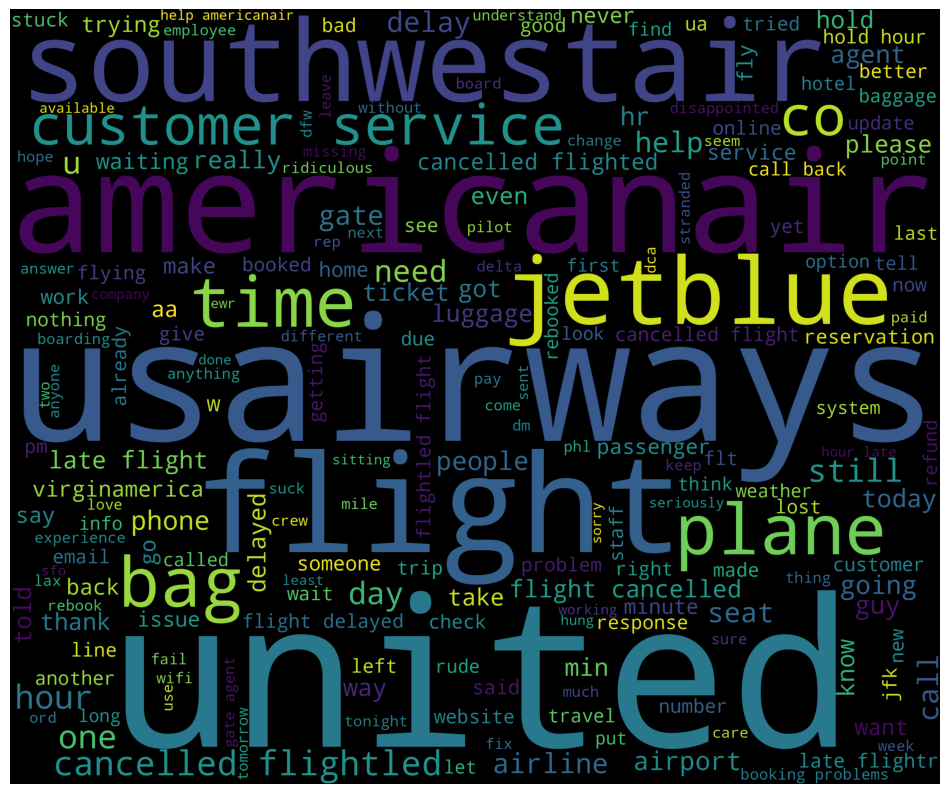

In [ ]:
for sentiment in df['sentiment'].unique():
  print(f'WordCloud for sentiment: {sentiment}')
  create_wordcloud(df, sentiment)

# Implementing TF-IDF:

In [72]:
tfidf_vec = TfidfVectorizer(max_features=5000)
# Transform the text with TF-IDF:
data_features_tfidf = tfidf_vec.fit_transform(df['tweet'])

# Feature shape
data_features_tfidf = data_features_tfidf.toarray()

In [32]:
# Select the features and target
X_tfidf = data_features_tfidf
y = df['sentiment']

### Treating Imbalance:

In [33]:
sm = SMOTE(random_state=42)
x_bal, y_bal = sm.fit_resample(X_tfidf,y)

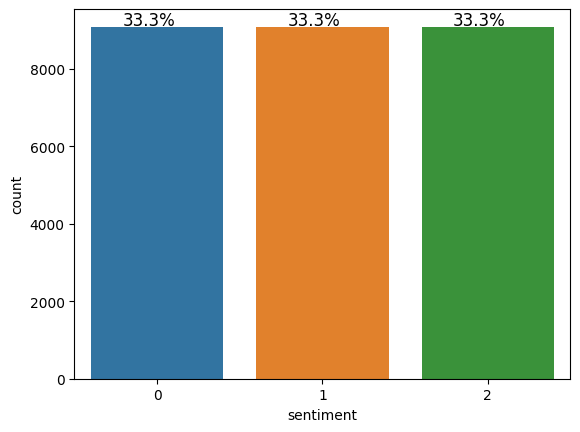

In [36]:
x_df = pd.DataFrame(x_bal)
y_df = pd.DataFrame(y_bal, columns=['sentiment'])
df1 = pd.concat([x_df, y_df], axis=1)
bar_plot(df1,'sentiment')

In [37]:
y_bal.value_counts(normalize=True)

1    0.333333
2    0.333333
0    0.333333
Name: sentiment, dtype: float64

In [38]:
# Split data into training and testing set.

x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.2, random_state=0)

In [54]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# Training the best model and calculating accuracy on test data
rf_tfidf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train the model
rf_tfidf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [40]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative', 'neutral', 'positive'], yticklabels = ['negative', 'neutral','positive'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1798
           1       0.87      0.88      0.87      1825
           2       0.93      0.91      0.92      1830

    accuracy                           0.89      5453
   macro avg       0.89      0.89      0.89      5453
weighted avg       0.89      0.89      0.89      5453



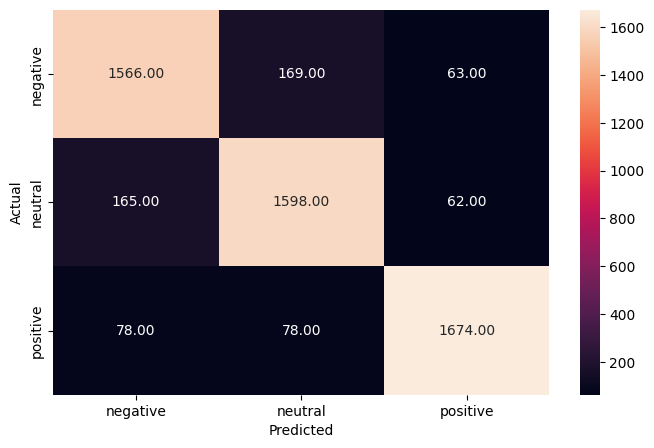

In [41]:
# make predictions on the test data
y_pred = rf_tfidf.predict(x_test)


# check metrics
metrics_score(y_test,y_pred)

## Saving Models:

In [42]:
with open('/content/drive/MyDrive/MLOps Class/Project 1/Model/rand_class.pkl', 'wb') as model:
  pickle.dump(rf_tfidf, model)

In [43]:
with open('/content/drive/MyDrive/MLOps Class/Project 1/Model/tf_idVect.pkl', 'wb') as vectorizer:
  pickle.dump(tfidf_vec, vectorizer)

In [44]:
with open('/content/drive/MyDrive/MLOps Class/Project 1/Model/lemm.pkl', 'wb') as lem:
  pickle.dump(lm, lem)

In [76]:
# Function to lemmatize and vectorize texts:
def vectorizer_func(text, vectorizer):
  text_list = []
  text_list.append(text)

  data_ = pd.DataFrame(text_list, columns=['text'])
  vectorized_text = vectorizer.transform(data_['text']).toarray()
  return vectorized_text